# Visualize Alpine-3D downscalled meteorology

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *

In [2]:
# Load Alpine-3D
ds = xr.open_dataset("../output/grids/a3d_grids.nc")

# Load Alpine-3D topography 
# dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = np.flipud(np.loadtxt("../input/modified_surface_grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

In [3]:
# Trim grids
ds = ds.isel(easting=slice(5, -5))
ds = ds.isel(northing=slice(5, -5))

dem = dem.isel(easting=slice(5, -5))
dem = dem.isel(northing=slice(5, -5))

# Organize data for plotting

In [16]:
# Get easting and northing
x_snowpack = ds['easting']
y_snowpack = ds['northing']

# Alpine-3D variable

# Delta SWE
# A3D_var = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0); A3D_var *= 1000; colormap=YlGnBu_9.mpl_colormap #colormap=RdBu_11.mpl_colormap

# # Drifting snow frequency 
# erosion = ds['ERODEDMASS'] > 0
# A3D_var = 100 * erosion.sum(dim='time') / len(ds['time']); colormap=Purples_9.mpl_colormap

# Surface temperature
# A3D_var = ds['ts'].mean(dim='time') - 273.15; colormap=YlOrRd_9.mpl_colormap

# Precipitation
# A3D_var = ds['pr'].sum(dim='time'); colormap=YlGnBu_9.mpl_colormap

# Wind Speed
# A3D_var = ds['ws'].mean(dim='time'); colormap=Purples_9.mpl_colormap

# Bulk snow density
A3D_var = ds['snow_density'].isel(time=0); colormap=PuBuGn_9.mpl_colormap

# Change in snow height
# snow_height = ds['swe'] * 1000 / ds['snow_density']
# A3D_var = snow_height.isel(time=-1) - snow_height.isel(time=0); colormap=RdBu_11.mpl_colormap


# Plot variable

<xarray.DataArray 'snow_density' ()>
array(461.01706, dtype=float32)
Coordinates:
    time     datetime64[ns] 1980-01-01T01:00:00


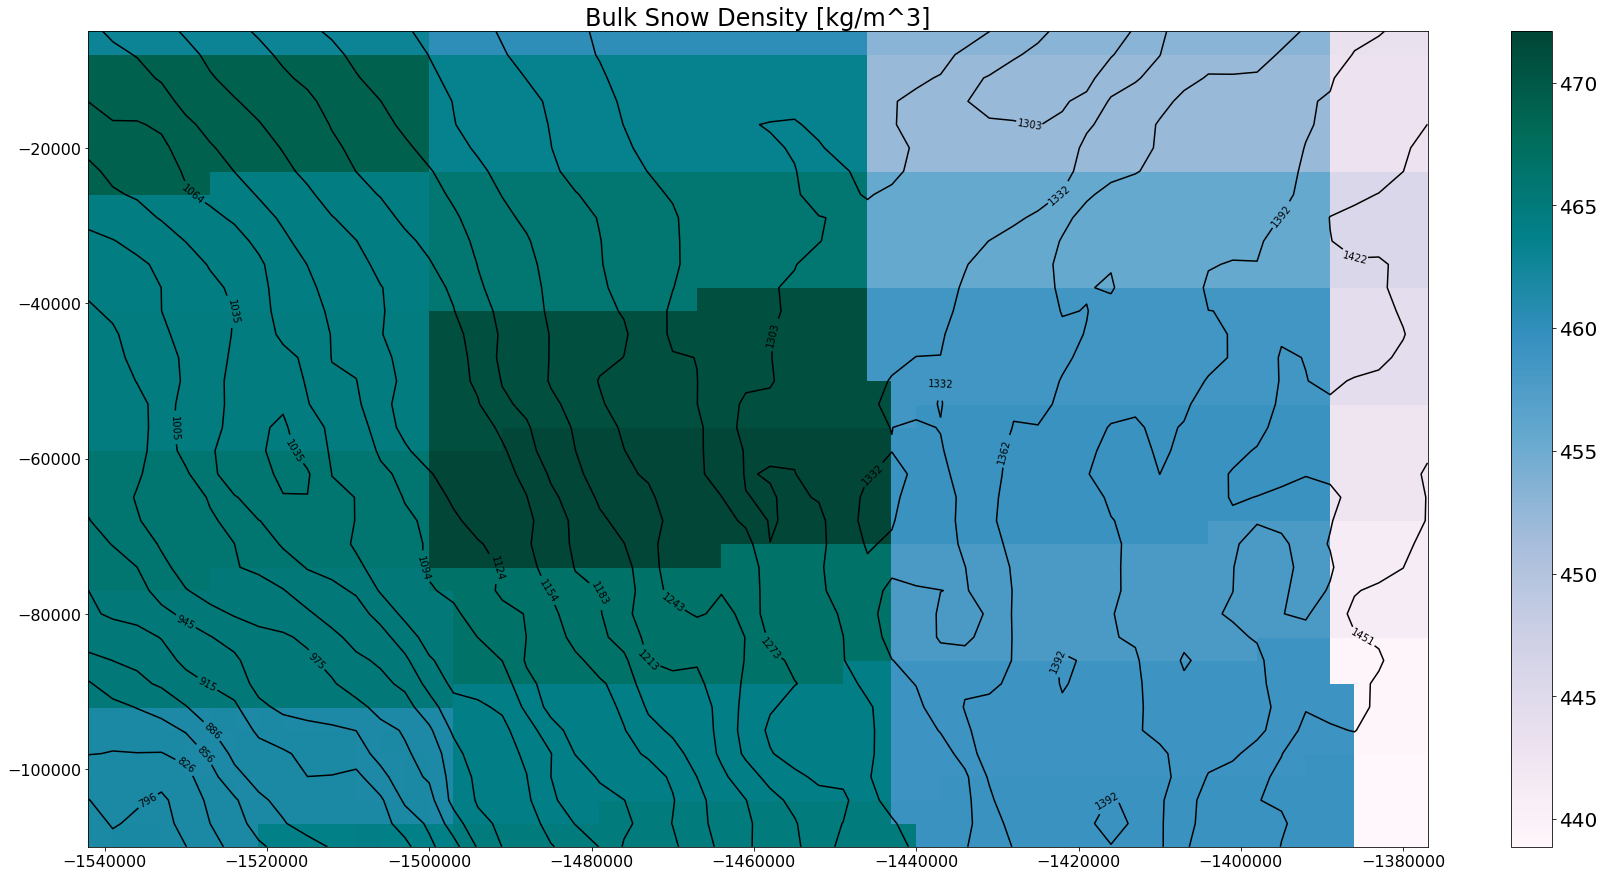

In [18]:
# Create figure
plt.figure(figsize=(30,15))

# DEM
contour_levels = np.linspace(dem.min(), dem.max(), 25)
contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
plt.clabel(contour, fmt = '%.0f', inline = True)

# Alpine-3D variable
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap = colormap, vmin=-np.abs(A3D_var).max(), vmax=np.abs(A3D_var).max())
plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=A3D_var.min(), vmax=A3D_var.max())
plt.title('Bulk Snow Density [kg/m^3]', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
print(A3D_var.mean())
plt.savefig("A3D_meteorology.pdf", dpi=100)

# DEM comparison

In [6]:
# Load data sets
dem_high_res = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem_low_res = np.flipud(np.loadtxt("../input/modified_surface_grids/dem.asc", skiprows=6))

# Define colorbar
colormap=RdBu_11.mpl_colormap

# Define colorbar limits
high_res_max = dem_high_res.max()
high_res_min = dem_high_res.min()
low_res_max = dem_low_res.max()
low_res_min = dem_low_res.min()

maxima = np.maximum(high_res_max, low_res_max)
minima = np.minimum(high_res_min, low_res_min)

# Plot DEM (High Resolution)

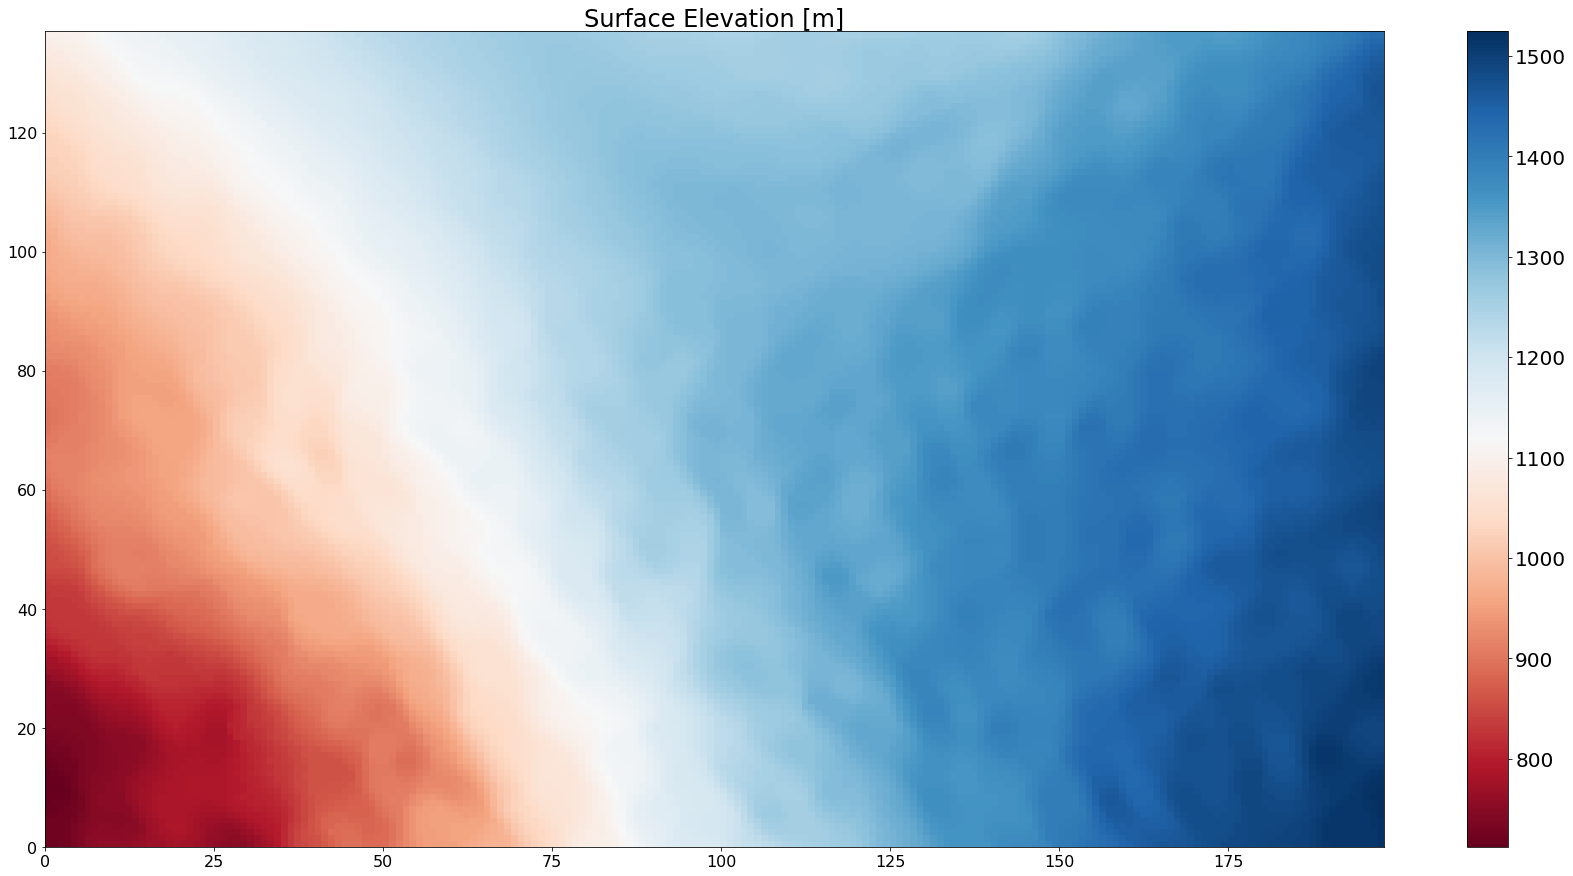

In [7]:
# Create figure
plt.figure(figsize=(30,15))
plt.pcolor(dem_high_res, cmap=colormap, vmin=minima, vmax=maxima)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Surface Elevation [m]', fontsize=24)
plt.savefig("A3D_meteorology.pdf", dpi=100)

# Plot DEM (Lower Resolution)


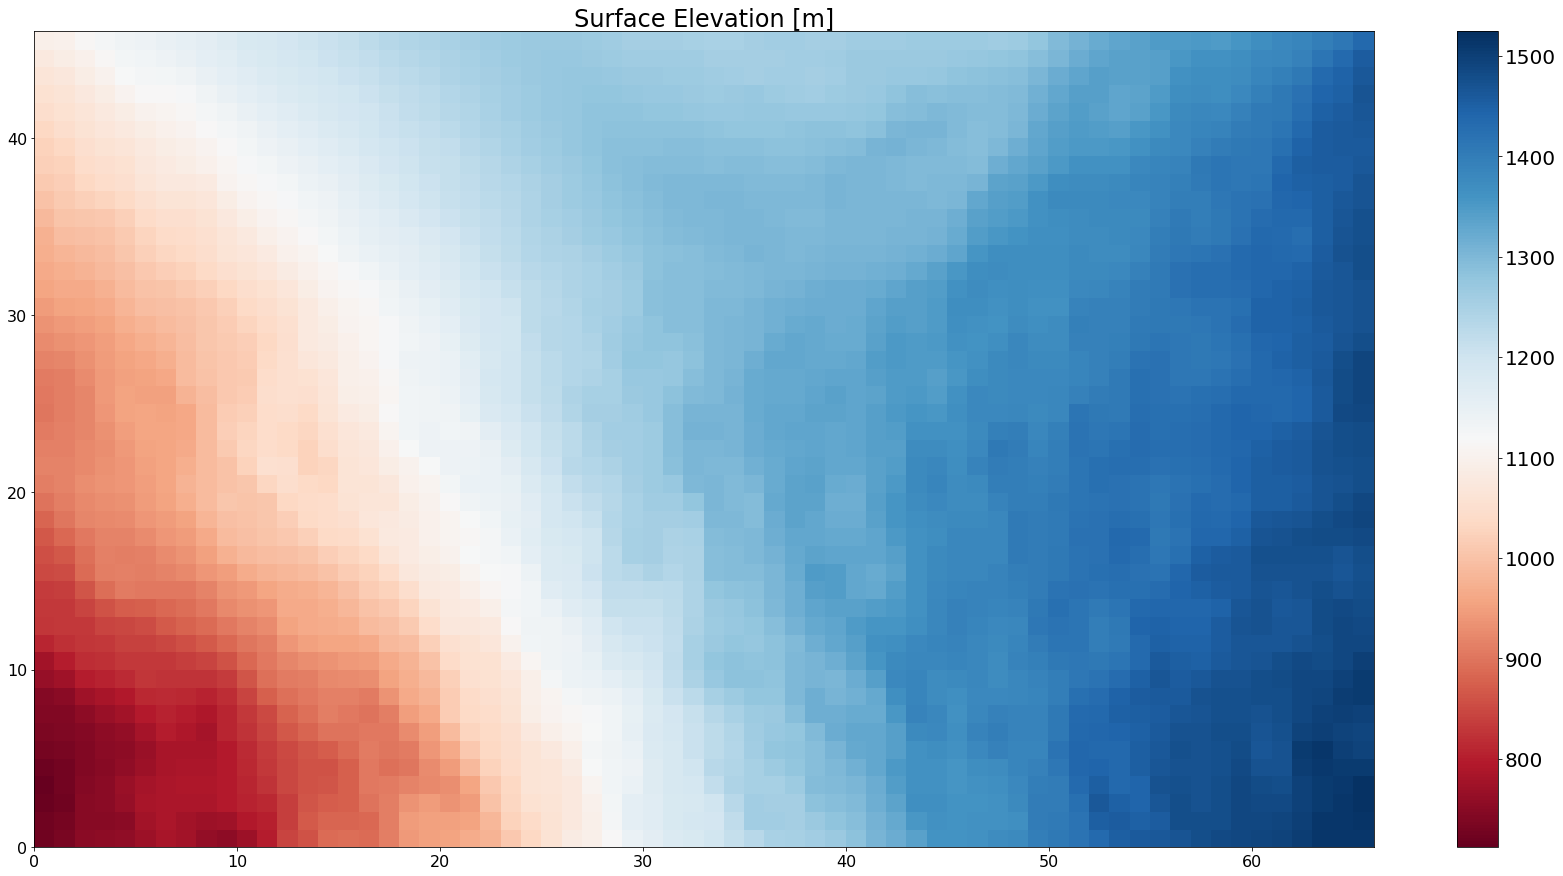

In [8]:
# Create figure
plt.figure(figsize=(30,15))
plt.pcolor(dem_low_res, cmap=colormap, vmin=minima, vmax=maxima)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Surface Elevation [m]', fontsize=24)
plt.savefig("A3D_meteorology.pdf", dpi=100)

In [9]:
ds.close()